<a href="https://colab.research.google.com/github/smrutipunto/OPT/blob/main/opt_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Particle Swarm Optimization (PSO)
import numpy as np
import matplotlib.pyplot as plt

# Objective function: Sphere function
def sphere(x):
    return np.sum(x ** 2)

# Particle class
class Particle:
    def __init__(self, dim, bounds):
        self.position = np.random.uniform(bounds[0], bounds[1], dim)
        self.velocity = np.random.uniform(-1, 1, dim)
        self.best_position = self.position.copy()
        self.best_score = float('inf')

    def update_velocity(self, global_best, w, c1, c2):
        r1, r2 = np.random.rand(2)
        cognitive = c1 * r1 * (self.best_position - self.position)
        social = c2 * r2 * (global_best - self.position)
        self.velocity = w * self.velocity + cognitive + social

    def update_position(self, bounds):
        self.position += self.velocity
        # Clamp position to bounds
        self.position = np.clip(self.position, bounds[0], bounds[1])

In [ ]:
def pso(objective, dim, bounds, num_particles, max_iter, w=0.5, c1=1.5, c2=1.5):
    swarm = [Particle(dim, bounds) for _ in range(num_particles)]
    global_best_position = np.random.uniform(bounds[0], bounds[1], dim)
    global_best_score = float('inf')

    for _ in range(max_iter):
        for particle in swarm:
            fitness = objective(particle.position)
            if fitness < particle.best_score:
                particle.best_score = fitness
                particle.best_position = particle.position.copy()
            if fitness < global_best_score:
                global_best_score = fitness
                global_best_position = particle.position.copy()
        for particle in swarm:
            particle.update_velocity(global_best_position, w, c1, c2)
            particle.update_position(bounds)

    return global_best_position, global_best_score, swarm

Best position: [-6.40531286e-14  8.55570321e-14]
Best score: 1.1422809029396088e-26


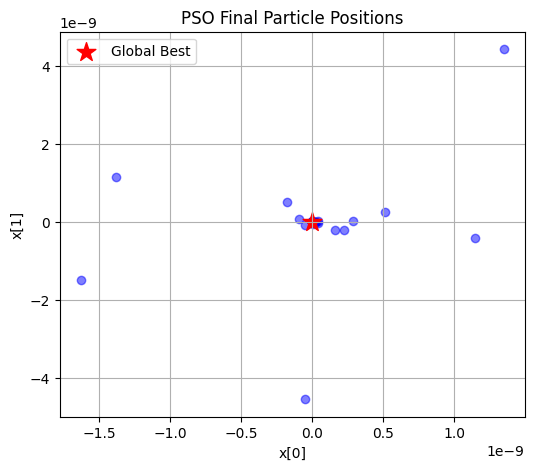

In [ ]:
# Example usage
if __name__ == "__main__":
    dim = 2  # For visualization keep dim=2
    bounds = (-10, 10)
    best_pos, best_score, swarm = pso(sphere, dim, bounds, num_particles=30, max_iter=100)

    print(f"Best position: {best_pos}")
    print(f"Best score: {best_score}")

    # Visualization (only for 2D)
    if dim == 2:
        plt.figure(figsize=(6, 5))
        for particle in swarm:
            plt.scatter(*particle.position, color='blue', alpha=0.5)
        plt.scatter(*best_pos, color='red', marker='*', s=200, label='Global Best')
        plt.title("PSO Final Particle Positions")
        plt.xlabel("x[0]")
        plt.ylabel("x[1]")
        plt.legend()
        plt.grid(True)
        plt.show()